# 데이터 삽입

In [78]:
import pymysql

In [79]:
conn = pymysql.connect(host = 'localhost',user='bigdb',password='bigdb1234', \
                      db='weblog',charset='utf8')

In [80]:
cur = conn.cursor(pymysql.cursors.DictCursor)

In [81]:
# 파이썬에서 String을 씌워서 내보내고 sql에서 String을 받아서 껍질을 벗기고 해석함!!!
sql = "select * from url" 
cur.execute(sql)
result = cur.fetchall()

In [82]:
cur.close()
conn.close()

In [83]:
import pandas as pd
df_row = pd.DataFrame(result)

In [84]:
df_row.head()

,no,sitenum,sessionid,connectid,curdate,ip,refhost,refpage,refparam,enc_refparam,...,freq,conversion,motivepsitename,motiveadtype,motiveautoad2,useragent,colors,pcookie,jscript,jsversion
0,1,1,1333593567390,1333593567390,2012-04-05 11:39:27,1.212.199.210,,/,,,...,0,0,None,NaN,None,None,None,None,None,None
1,2,1,1333593819658,1333593819658,2012-04-05 11:43:50,220.117.130.25,web.search.naver.com,/search.naver,sm=tab_hty.top&where=site&ie=utf8&query=%EB%B9...,sm=tab_hty.top&where=site&ie=utf8&query=비젠 소프트,...,0,0,None,NaN,None,None,None,None,None,None
2,3,1,1333594077774,1333594077774,2012-04-05 11:47:55,210.101.132.204,search.naver.com,/search.naver,where=nexearch&sm=ies_hty&ie=utf8&query=%EC%9B...,where=nexearch&sm=ies_hty&ie=utf8&query=웹사이트제작,...,0,0,None,NaN,None,None,None,None,None,None
3,4,1,1333594145987,1333594145987,2012-04-05 11:48:58,125.141.117.228,search.naver.com,/search.naver,sm=tab_hty.top&where=nexearch&ie=utf8&query=%E...,sm=tab_hty.top&where=nexearch&ie=utf8&query=성형...,...,0,0,None,NaN,None,None,None,None,None,None
4,5,1,1313570477932,1333594167703,2012-04-05 11:49:18,112.187.232.207,xx.xxsoft.com,/projects/project/search.jsp,,,...,0,0,None,NaN,None,None,None,None,None,None


In [85]:
len(df_row.index)

1222461

In [86]:
df_row.columns

Index(['no', 'sitenum', 'sessionid', 'connectid', 'curdate', 'ip', 'refhost',
       'refpage', 'refparam', 'enc_refparam', 'refsearch', 'urlpage',
       'urlparam', 'enc_urlparam', 'browser', 'browsername', 'os', 'osversion',
       'resolution', 'lang', 'tzone', 'country', 'region', 'area', 'year',
       'month', 'day', 'hour', 'week', 'yoil', 'psiteno', 'siteno', 'sitename',
       'psitename', 'sectionno', 'sectionname', 'adtype', 'autoad', 'autoad2',
       'searchad', 'totalref', 'totalrefdetail', 'totalrefurl', 'viralno',
       'viralname', 'emailno', 'emailname', 'bannerno', 'bannername',
       'campaignno', 'campaignname', 'mktype', 'mkname', 'motive',
       'motivehost', 'motivepage', 'motiveparam', 'motivesearch',
       'motivesitename', 'motiveautoad', 'motivesearchad', 'motiveviralname',
       'motiveemailname', 'motivebannername', 'motivecampaignname',
       'startpage', 'endpage', 'pagecnt', 'residence', 'visit', 'freq',
       'conversion', 'motivepsitename', 'm

In [87]:
df = df_row

## 컨버젼 1처리

In [96]:
def change(data):
    if data==0:
        return 0
    else:
        return 1

In [97]:
df['conversion'] = df['conversion'].apply(change)

In [98]:
df['conversion'].value_counts()

0    1213528
1       8933
Name: conversion, dtype: int64

## 시본 사용

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
# 한글처리
from matplotlib import font_manager, rc
font_ = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_)

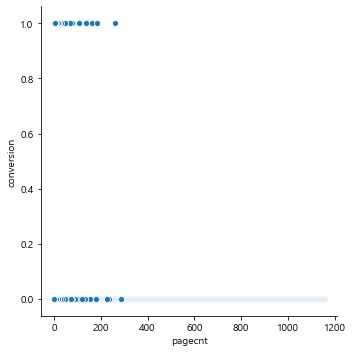

In [27]:
sns.relplot(x='pagecnt',y='conversion', data=df_row)
plt.show()

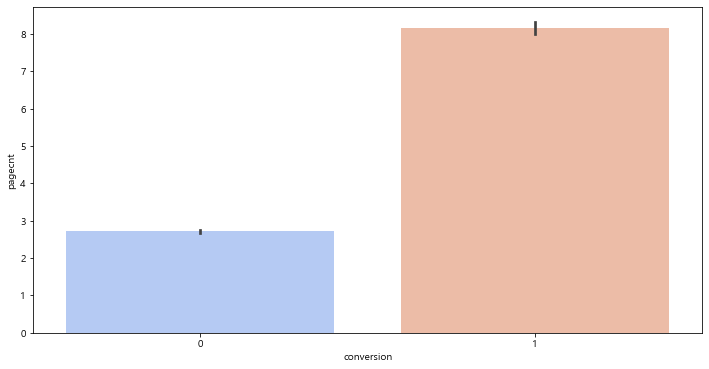

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='pagecnt', data=df, palette='coolwarm')
plt.show()

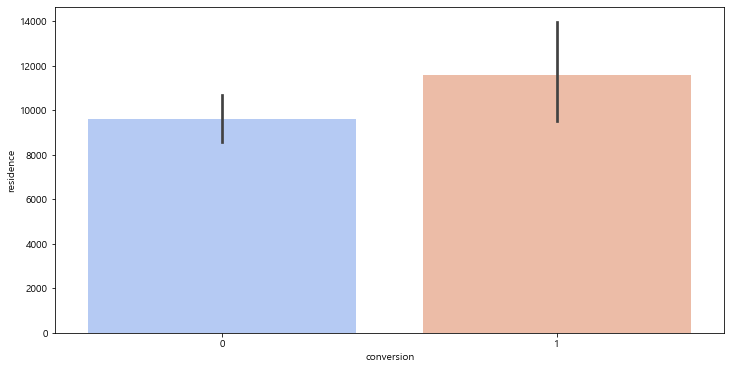

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='residence', data=df, palette='coolwarm')
plt.show()

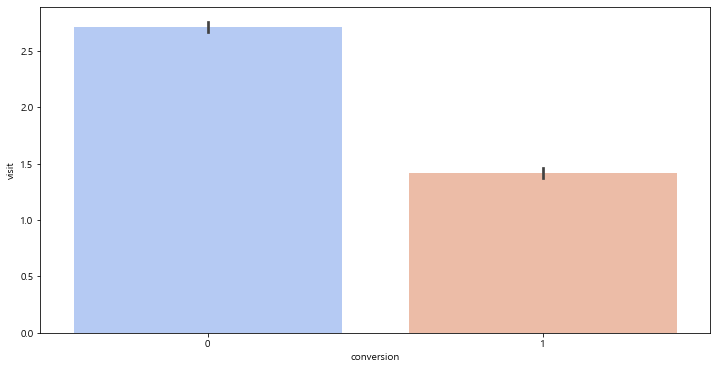

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='visit', data=df, palette='coolwarm')
plt.show()

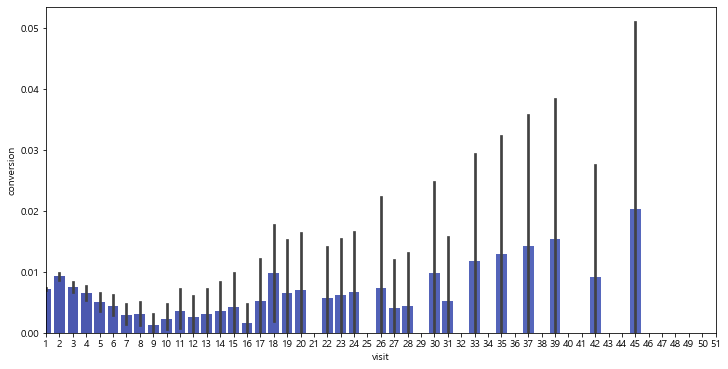

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x='visit', y='conversion', data=df, palette='coolwarm', )
plt.xlim(0, 50)
plt.show()

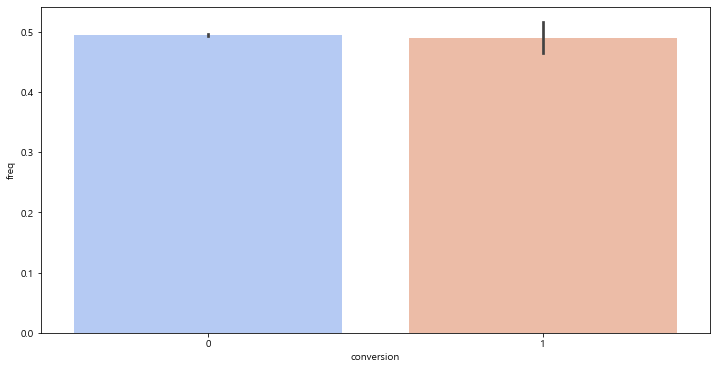

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='freq', data=df, palette='coolwarm')
plt.show()

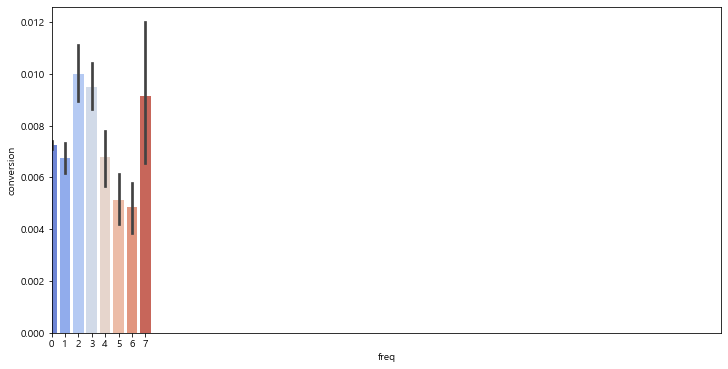

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(x='freq', y='conversion', data=df, palette='coolwarm', )
plt.xlim(0, 10)
plt.show()

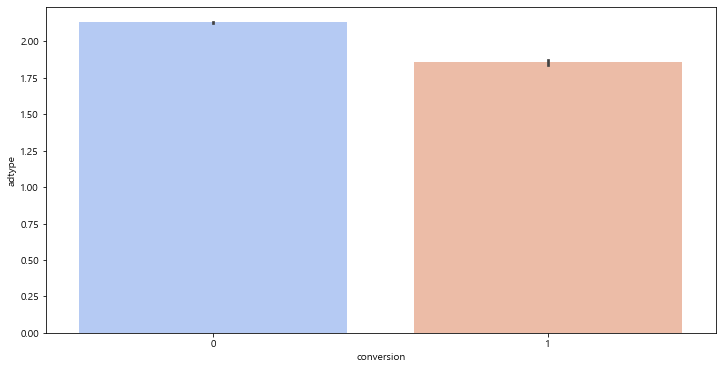

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='adtype', data=df, palette='coolwarm')
plt.show()

In [109]:
df2 = df[df['adtype']==2]
df2['autoad'].value_counts()

Series([], Name: autoad, dtype: int64)

In [113]:
df2['totalref'].value_counts()

윙고애드 - CPV      243389
듀얼매칭 - 언더팝업     158682
해보고 - 언더팝업       91539
네오클릭 - CPC       31525
포스트팁 - 언더팝업       5297
허브게이트 - 언더팝업       665
Name: totalref, dtype: int64

In [123]:
df2['freq'].value_counts()

0    452851
1     25551
3     15142
4     10321
5     10010
6      9208
2      6923
7      1091
Name: freq, dtype: int64

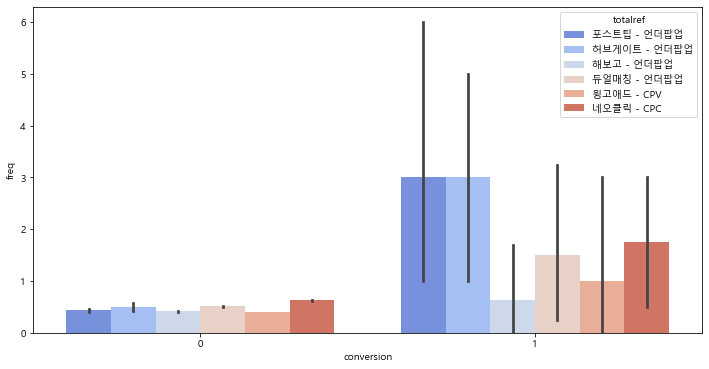

In [124]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='freq', data=df2, palette='coolwarm', hue='totalref')
plt.show()

In [125]:
df['sectionno'].value_counts()

0     938813
1     196964
2      57150
18     14819
8       9857
7       1561
3       1456
5        868
6        487
4        404
16        36
11        18
9         14
12         9
13         4
14         1
Name: sectionno, dtype: int64

In [114]:
df1 = df[df['adtype']==1]


In [116]:
df1['conversion'].value_counts()

0    262152
1      5098
Name: conversion, dtype: int64

In [119]:
df1['totalref'].value_counts()

네이버클릭초이스    135878
오버추어         70543
구글애드워즈       24513
다음클릭스        21151
애드워즈         15165
Name: totalref, dtype: int64

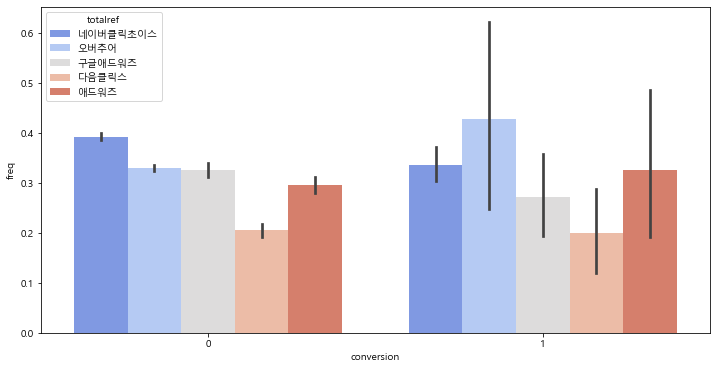

In [126]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='freq', data=df1, palette='coolwarm', hue='totalref')
plt.show()

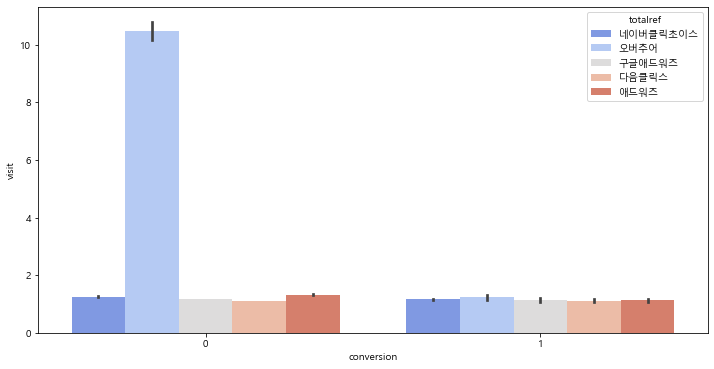

In [128]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='visit', data=df1, palette='coolwarm', hue='totalref')
plt.show()

In [117]:
df3 = df[df['adtype']==3]


In [118]:
df3['conversion'].value_counts()

0    420311
1      3803
Name: conversion, dtype: int64

In [120]:
df3['totalref'].value_counts()

직접방문                 208127
네이버                   97879
ncclick.co.kr         33171
google.co.kr          13703
다음                    13448
                      ...  
com.bd                    1
qrobo.com                 1
dolphin.com               1
19.215                    1
nationalopera.org         1
Name: totalref, Length: 1460, dtype: int64

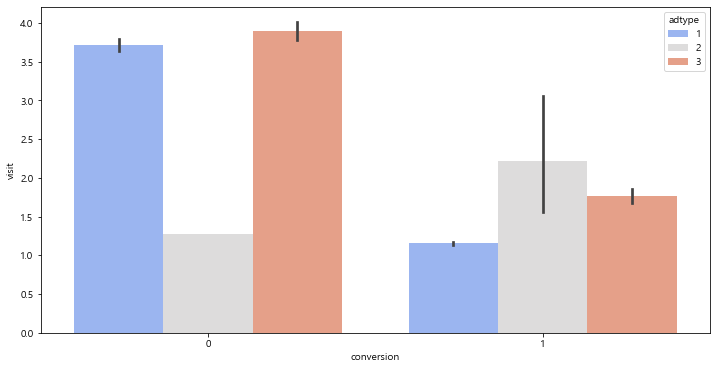

In [130]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='visit', data=df, palette='coolwarm', hue='adtype')
plt.show()

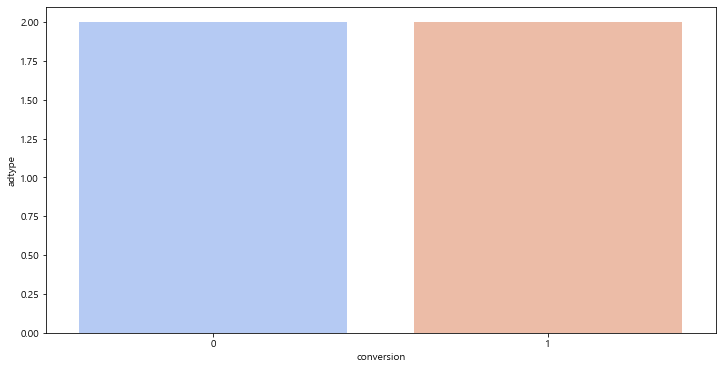

In [107]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='adtype', data=df2, palette='coolwarm')
plt.show()

In [132]:
df['visit'].value_counts()

1       1001834
2        119066
3         38618
4         17187
5          9404
         ...   
639           1
640           1
641           1
642           1
1024          1
Name: visit, Length: 1154, dtype: int64

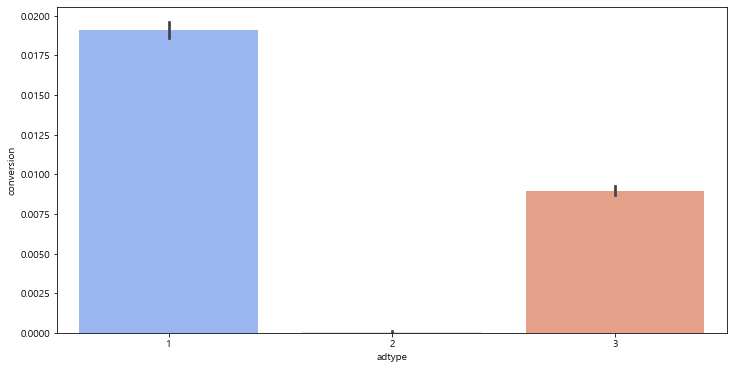

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x='adtype', y='conversion', data=df, palette='coolwarm')
plt.show()

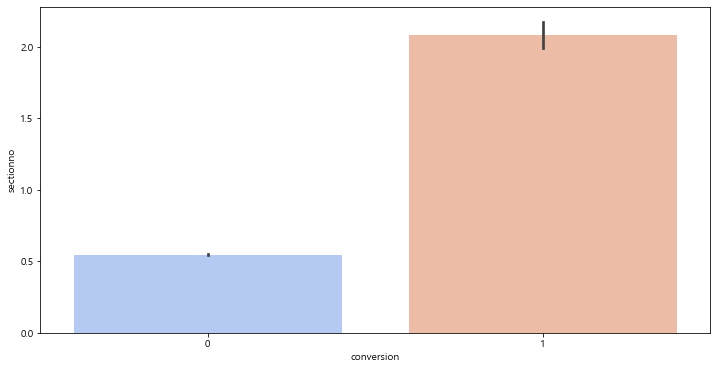

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='sectionno', data=df, palette='coolwarm')
plt.show()

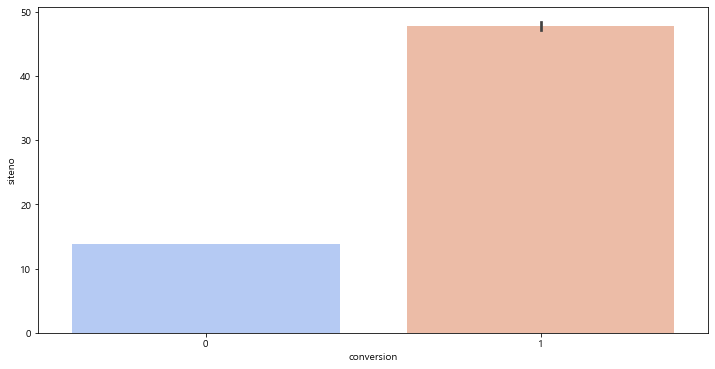

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='siteno', data=df, palette='coolwarm')
plt.show()

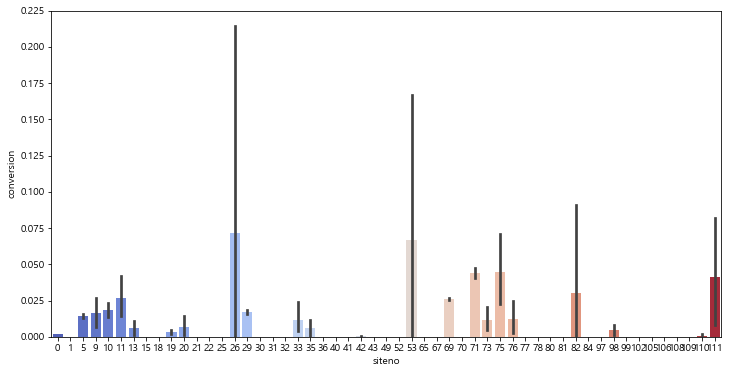

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x='siteno', y='conversion', data=df, palette='coolwarm')
plt.show()

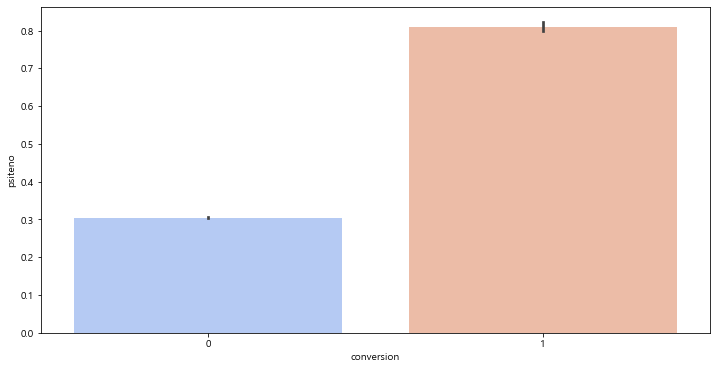

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='psiteno', data=df, palette='coolwarm')
plt.show()

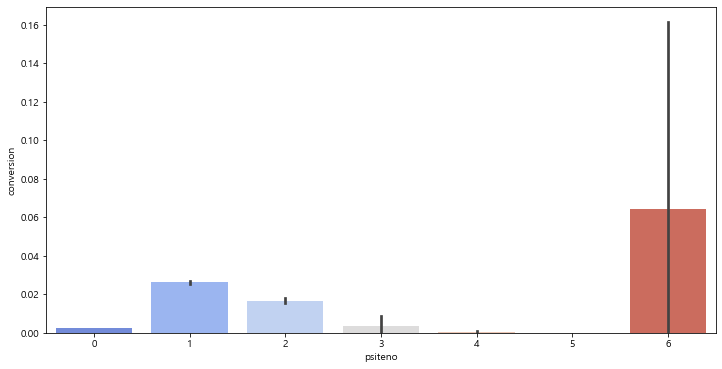

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x='psiteno', y='conversion', data=df, palette='coolwarm')
plt.show()

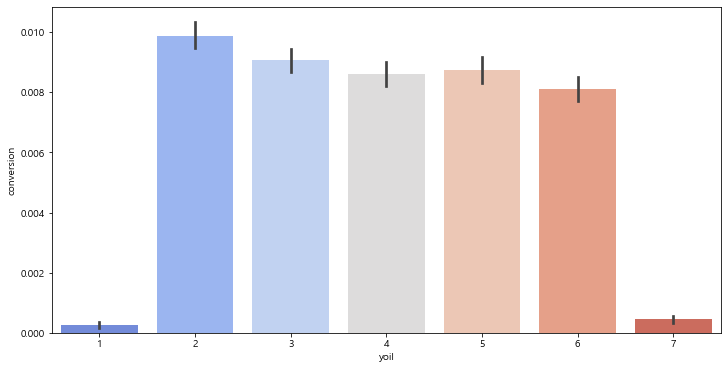

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(x='yoil', y='conversion', data=df, palette='coolwarm')
plt.show()



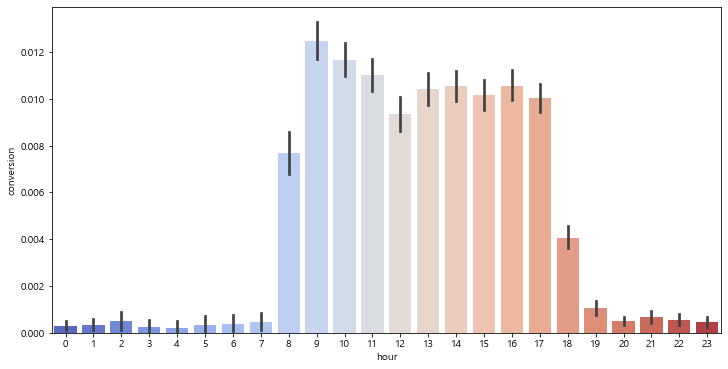

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x='hour', y='conversion', data=df, palette='coolwarm')
plt.show()



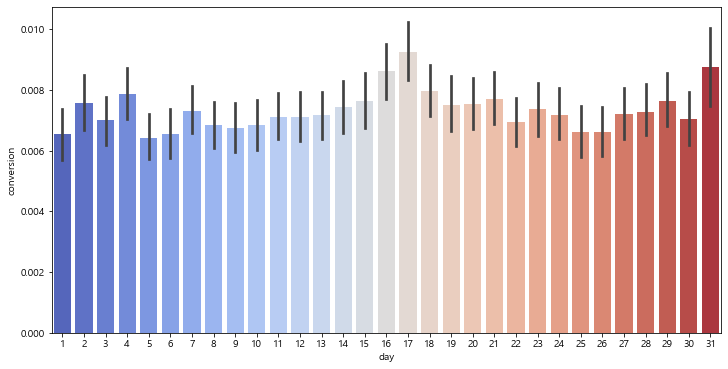

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(x='day', y='conversion', data=df, palette='coolwarm')
plt.show()



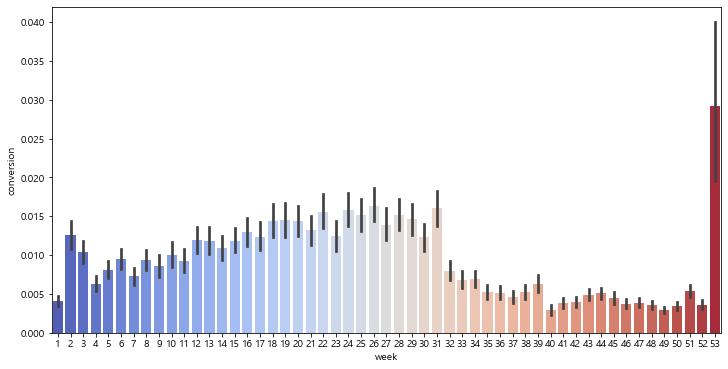

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x='week', y='conversion', data=df, palette='coolwarm')
plt.show()

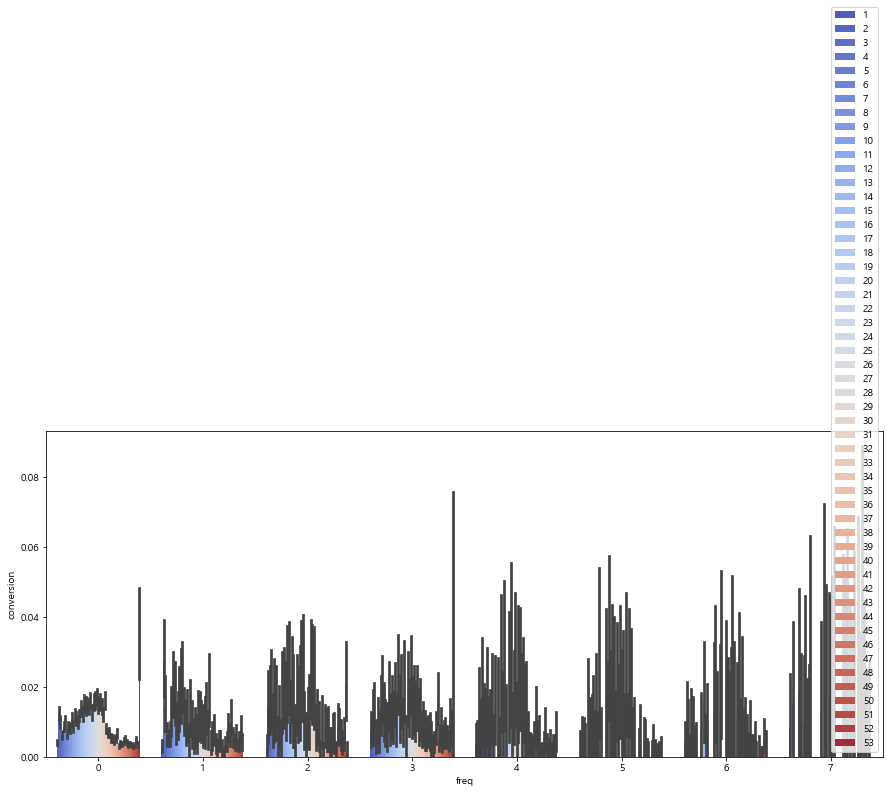

In [144]:
plt.figure(figsize=(15,6))
sns.barplot(x='freq', y='conversion', data=df, palette='coolwarm', hue='week' )
plt.legend()
plt.show()

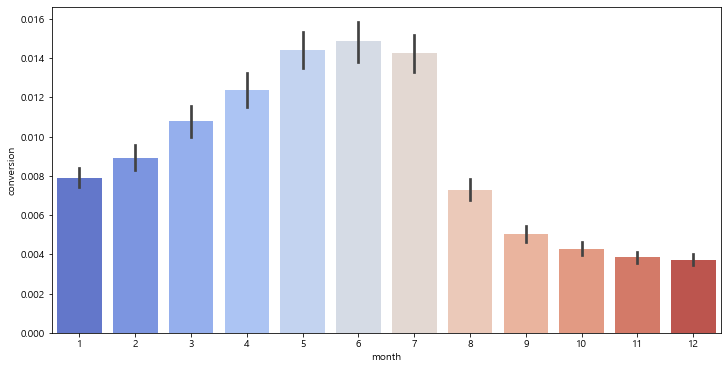

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y='conversion', data=df, palette='coolwarm')
plt.show()

In [62]:
df['country'].isnull().sum()

52647

## 나라 분류

In [88]:
df['country'].value_counts()

Korea, Republic of        1130370
United States               17959
China                        7875
Japan                        4220
Canada                       1628
                           ...   
Haiti                           1
Bosnia and Herzegovina          1
Bolivia                         1
Afghanistan                     1
Luxembourg                      1
Name: country, Length: 129, dtype: int64

In [89]:
df['country'] = df['country'].fillna('other')

In [90]:
# 0은 없는값
df['country'].isnull().sum()

0

In [91]:
def coun_change(data):
    if data=='Korea, Republic of':
        return 1
    else:
        return 0

In [92]:
df['country_no'] = df['country'].apply(coun_change)

In [93]:
df['country_no'].value_counts()

1    1130370
0      92091
Name: country_no, dtype: int64

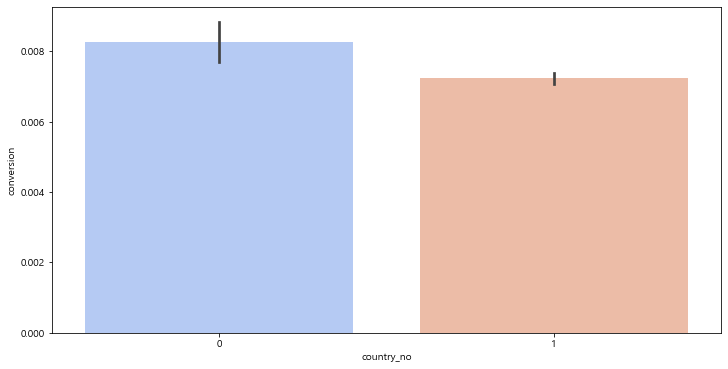

In [99]:
plt.figure(figsize=(12,6))
sns.barplot(x='country_no', y='conversion', data=df, palette='coolwarm')
plt.show()

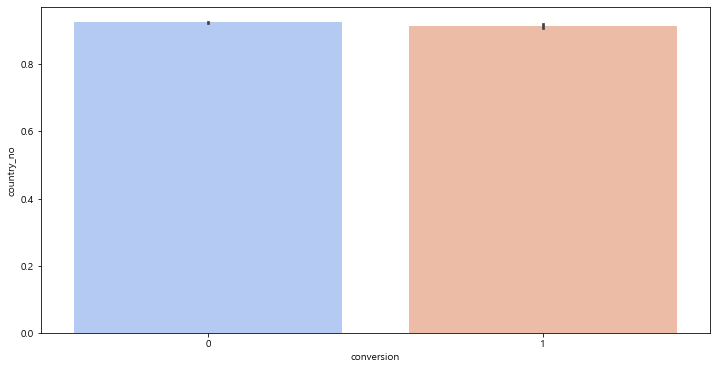

In [100]:
plt.figure(figsize=(12,6))
sns.barplot(x='conversion', y='country_no', data=df, palette='coolwarm')
plt.show()

In [101]:
df['adtype'].isnull().sum()

0

In [104]:
df2 = df[df['adtype']==2]

In [52]:
df['siteno'].isnull().sum()

0

## 모바일, pc, etc

In [133]:
df['os'].value_counts()

Windows               1095657
ETC                     73152
IOS                     12449
Linux                    8135
android                  7599
Mac                      5803
Android                  5126
Mac OS                   4776
iPhone                   3733
LG smartphone            3301
SAMSUNG smartphone       1028
LINUX                     722
iPad                      596
Windows 7                 147
Windows ME                 59
Windows7                   51
Ubuntu                     41
UNIX                       26
WindowsME                  20
Windows 98                 13
WindowsXP                   6
Windows Vista               5
Windows%207                 4
windows                     4
etc                         2
Windows XP                  2
motorola                    2
Sony Ericsson               1
Black Berry                 1
Name: os, dtype: int64

In [134]:
mobile = ['IOS','android','Android','iPhone','LG smartphone','SAMSUNG smartphone','iPad','motorola','Sony Ericsson','Black Berry']
etc = ['ETC','etc']

In [138]:
def os_change(data):
    if data in mobile:
        return 1
    elif data in etc:
        return 0
    else:
        return 2


In [139]:
df['os_no'] = df['os'].apply(os_change)

In [140]:
df['os_no'].value_counts()

2    1115471
0      73154
1      33836
Name: os_no, dtype: int64

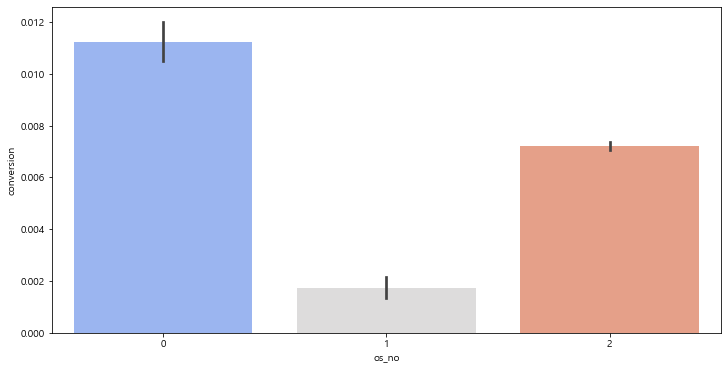

In [141]:
plt.figure(figsize=(12,6))
sns.barplot(x='os_no', y='conversion', data=df, palette='coolwarm')
plt.show()